In [2]:
import csv
import numpy as np
from scipy.stats import mannwhitneyu, kendalltau
from itertools import permutations

In [3]:
def read_curriculum(filename):
    curriculum = []
    with open(filename, 'r')as fh:
        for line in fh:
            train_set = line.split("\n")[0]
            train_set = train_set[1:-1]
            train_set = train_set.split(" ")
            instances = []
            for t in train_set:
                try:
                    instances.append(int(t))
                except:
                    pass
            curriculum.append(instances)
    return curriculum

In [4]:
def make_curriculum(feats, start):
    normalized_feats = [normalize_pm(instance) for instance in feats]
    curriculum = [normalized_feats[start]]
    size = 1
    for i in range(len(feats)-1):
        size += 1
        mean_instance = np.mean(curriculum, axis=0)
        differences = [mean_instance - instance for instance in normalized_feats]
        indices = np.argsort(differences)
        iteration = [normalized_feats[i] for i in indices[:size]]
        curriculum.append(iteration)
    return curriculum

In [5]:
def load_instances(file):
    feats = []
    with open(file, "r") as f:  
        reader = csv.reader(f)  
        next(reader)           
        for row in reader:
            f = []
            for i in range(len(row)):  
                if i != 0:            
                    try:             
                        f.append(float(row[i]))  
                    except:                 
                        f.append(row[i])    
            feats.append(f)  
    return feats

In [6]:
def rank_instances(curriculum, n_instances):
    max_points = len(curriculum)
    ranks = np.zeros(n_instances)
    for iteration in range(len(curriculum)):
        for instance in curriculum[iteration]:
            ranks[instance] += max_points-iteration
    return ranks

In [7]:
def rank_frequency(curriculum, n_instances):
    ranks = np.zeros(n_instances)
    for iteration in range(len(curriculum)):
        for instance in curriculum[iteration]:
            ranks[instance] += 1
    return ranks

In [8]:
def normalize_pm(value):
    first = (value[0]+4)/8
    second = (value[1]-0.5)/7.5
    third = value[2]/4
    return [first, second, third]

In [71]:
def normalize_am(value):
    first = (value[0]+4)/750
    second = (value[1]-0.5)/800
    third = value[2]/4
    return [first, second, third]

In [72]:
def compute_distances(curriculum, instance_feats, normalize="pm"):
    differences = []
    for i in range(len(curriculum)-1):
        current = curriculum[i]
        next_one = curriculum[i+1]
        set1 = []
        set2 = []
        for inst in current:
            if normalize=="pm":
                set1.append(normalize_pm(instance_feats[inst]))
            else:
                set1.append(normalize_am(instance_feats[inst]))
        for inst in next_one:
            if normalize=="pm":
                set2.append(normalize_pm(instance_feats[inst]))
            else:
                set2.append(normalize_am(instance_feats[inst]))
        mean_inst1 = np.mean(set1, axis=0)
        mean_inst2 = np.mean(set2, axis=0)
        differences.append(np.abs(np.mean(mean_inst1-mean_inst2)))
    return differences

In [73]:
ranks = []
frequencies = []
distances = []
feats = load_instances('features/cpm_train_100.csv')
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for s in seeds:
    cur = read_curriculum(f'results/cpm_trpo100_spl{s}/instance_curriculum.txt')
    ranks.append(rank_instances(cur, 100))
    frequencies.append(rank_frequency(cur, 100))
    distances.append(compute_distances(cur, feats))
mean_rank = np.mean(ranks, axis=0)
print(f"Average instance curriculum: {np.argsort(mean_rank)[::-1]}")
mean_frequency = np.mean(frequencies, axis=0)
print(f"Instances ranked by average frequency: {np.argsort(mean_frequency)[::-1]}")
min_len = min([len(cur) for cur in distances])
distances = [cur[:min_len] for cur in distances]
mean_distance = np.mean(distances, axis=0)
print(f"Average distance between instances in curriculum: {np.mean(mean_distance)}")
print(f"Max distance between instances in curriculum: {max(mean_distance)}")
print(f"Min distance between instances in curriculum: {min(mean_distance)}")

Average instance curriculum: [ 5  7  2  0 72 71 70 69 68 67 66 65 64 63 62 61 60 59 58 57 56 55 54 53
 52 73 74 76 97 96 95 94 93 92 91 90 89 88 87 86 85 84 83 82 81 80 79 78
 77 50 49 48 21 20 19 18 17 16 15 14 13 12 11 10  9  8  6  4  3 22 23 24
 25 47 46 45 44 43 42 41 40 39 38 98 37 35 34 33 32 31 30 29 27 26 36 99
 75 51  1 28]
Instances ranked by average frequency: [ 5  7  2  0 72 71 70 69 68 67 66 65 64 63 62 61 60 59 58 57 56 55 54 53
 52 73 74 76 97 96 95 94 93 92 91 90 89 88 87 86 85 84 83 82 81 80 79 78
 77 50 49 48 21 20 19 18 17 16 15 14 13 12 11 10  9  8  6  4  3 22 23 24
 25 47 46 45 44 43 42 41 40 39 38 98 37 35 34 33 32 31 30 29 27 26 36 99
 75 28  1 51]
Average distance between instances in curriculum: 0.026022160768225746
Max distance between instances in curriculum: 0.044813194726613596
Min distance between instances in curriculum: 0.0


In [74]:
ranks_ag = []
frequencies = []
distances = []
feats = load_instances('features/ag_oj_train.csv')
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for s in seeds:
    cur = read_curriculum(f'results/antgoal_oj_spl{s}/instance_curriculum.txt')
    ranks_ag.append(rank_instances(cur, 100))
    frequencies.append(rank_frequency(cur, 100))
    distances.append(compute_distances(cur, feats))
mean_rank_ag = np.mean(ranks_ag, axis=0)
print(f"Average instance curriculum: {np.argsort(mean_rank)[::-1]}")
mean_frequency_ag = np.mean(frequencies, axis=0)
print(f"Instances ranked by average frequency: {np.argsort(mean_frequency)[::-1]}")
min_len = min([len(cur) for cur in distances])
distances_ag = [cur[:min_len] for cur in distances]
mean_distance_ag = np.mean(distances_ag, axis=0)
print(f"Average distance between instances in curriculum: {np.mean(mean_distance)}")
print(f"Max distance between instances in curriculum: {max(mean_distance)}")
print(f"Min distance between instances in curriculum: {min(mean_distance)}")

Average instance curriculum: [ 5  7  2  0 72 71 70 69 68 67 66 65 64 63 62 61 60 59 58 57 56 55 54 53
 52 73 74 76 97 96 95 94 93 92 91 90 89 88 87 86 85 84 83 82 81 80 79 78
 77 50 49 48 21 20 19 18 17 16 15 14 13 12 11 10  9  8  6  4  3 22 23 24
 25 47 46 45 44 43 42 41 40 39 38 98 37 35 34 33 32 31 30 29 27 26 36 99
 75 51  1 28]
Instances ranked by average frequency: [ 5  7  2  0 72 71 70 69 68 67 66 65 64 63 62 61 60 59 58 57 56 55 54 53
 52 73 74 76 97 96 95 94 93 92 91 90 89 88 87 86 85 84 83 82 81 80 79 78
 77 50 49 48 21 20 19 18 17 16 15 14 13 12 11 10  9  8  6  4  3 22 23 24
 25 47 46 45 44 43 42 41 40 39 38 98 37 35 34 33 32 31 30 29 27 26 36 99
 75 28  1 51]
Average distance between instances in curriculum: 0.026022160768225746
Max distance between instances in curriculum: 0.044813194726613596
Min distance between instances in curriculum: 0.0


In [75]:
ranks_cl = []
frequencies = []
distances = []
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for s in seeds:
    cur = read_curriculum(f'results/cpm_trpo100_cl{s}/instance_curriculum.txt')
    ranks_cl.append(rank_instances(cur, 100))
    frequencies.append(rank_frequency(cur, 100))
    distances.append(compute_distances(cur, feats))
mean_rank_cl = np.mean(ranks_cl, axis=0)
print(np.argsort(mean_rank_cl)[::-1])
mean_frequency_cl = np.mean(frequencies, axis=0)
print(np.argsort(mean_frequency_cl)[::-1])
distances = [cur[:min_len] for cur in distances]
mean_distance_cl = np.mean(distances, axis=0)
print(np.mean(mean_distance_cl))
print(max(mean_distance_cl))
print(min(mean_distance_cl))

[ 6  4  8  7  5 31 81 21 39 42 68 51 47 79 67  1 32 98 45 96 89 72 54 93
 53 62 71 46 55 77 83 37 92 63 22 91 59 29  3 49 25 36 43 64 14 69 18 26
 15 10 16 78 50 34 40 11  2 17 94 52 23 30 48 58 27 85 61 82 84  9 33 87
 99 74 70 35  0 80 88 76 24 95 57 12 44 19 13 20 56 97 28 90 38 66 75 73
 60 41 65 86]
[ 6  4  8  7  5 31 81 21 39 42 68 51 47 79  1 67 32 98 45 96 89 54 72 93
 53 62 71 46 55 77 83 37 92 63 22 59 29 91  3 49 25 36 64 43 14 69 18 26
 15 10 78 16 50 34 40 11  2 17 94 52 23 30 48 58 27 85 61 82 84  9 33 87
 99 74 35 70 80 88  0 24 76 95 57 12 44 19 13 20 97 56 28 90 38 66 75 73
 60 41 65 86]
0.04141360441630488
0.08747895769671504
0.00016276615451673768


In [76]:
ranks_cl_ag = []
frequencies = []
distances = []
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for s in seeds:
    cur = read_curriculum(f'results/antgoal_ppo_cl{s}/instance_curriculum.txt')
    ranks_cl_ag.append(rank_instances(cur, 100))
    frequencies.append(rank_frequency(cur, 100))
    distances.append(compute_distances(cur, feats))
mean_rank_cl_ag = np.mean(ranks_cl_ag, axis=0)
print(np.argsort(mean_rank_cl_ag)[::-1])
mean_frequency_cl_ag = np.mean(frequencies, axis=0)
print(np.argsort(mean_frequency_cl_ag)[::-1])
distances = [cur[:min_len] for cur in distances]
mean_distance_cl_ag = np.mean(distances, axis=0)
print(np.mean(mean_distance_cl))
print(max(mean_distance_cl))
print(min(mean_distance_cl))

[ 2 62 51 48 54 25 41 90 12 89 55 65 59 79  8  5 26 53 67 75 96 93 77  7
 76  6 15 43 85  1 33 21 34  4 38 17 10 88 69 42 80 83 45 66 23 27  3 29
 56 94 16 36 19 74 14 95 84 91 78 60 92 47 30  9 13 28 63 40 20  0 64 57
 39 24 50 32 73 68 71 72 18 58 46 97 86 49 87 31 61 11 35 22 37 44 98 52
 70 81 82 99]
[ 2 62 51 48 54 25 41 90 12 89 55 65 59 79  8  7  5 26 53 75 67 96 93 77
 76  6 15 43 85  1 33 21 34  4 38 17 10 88 69 42 80 83 45 66 23 27  3 29
 56 94 16 36 19 74 14 95 84 91 78 60 92 47 30  9 13 28 63 40 20  0 64 57
 39 50 73 68 72 18 58 46 71 97 86 49 32 87 24 31 61 11 35 22 37 44 98 52
 70 81 82 99]
0.04141360441630488
0.08747895769671504
0.00016276615451673768


In [77]:
kendalltau(mean_rank, mean_rank_ag)

KendalltauResult(correlation=0.04849464637289129, pvalue=0.474760836167496)

In [78]:
kendalltau(mean_rank, mean_rank_cl)

KendalltauResult(correlation=-0.03637098477966847, pvalue=0.5919130918482463)

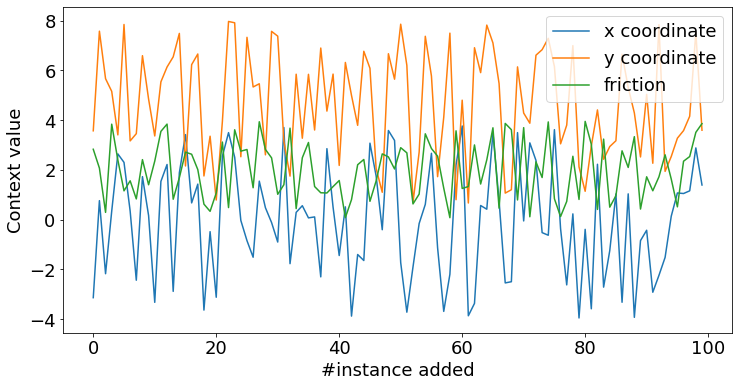

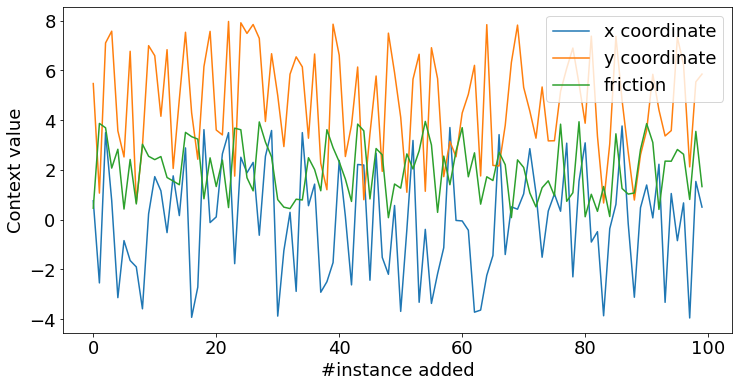

In [96]:
feats = load_instances('features/cpm_train_100.csv')
order = np.argsort(mean_rank)[::-1]
mean_cur_x = [feats[int(i)][0] for i in order]
mean_cur_y = [feats[i][1] for i in order]
mean_cur_friction = [feats[i][2] for i in order]

plt.figure(figsize=(12, 6))
plt.plot(np.arange(100), mean_cur_x, label="x coordinate")
plt.plot(np.arange(100), mean_cur_y, label="y coordinate")
plt.plot(np.arange(100), mean_cur_friction, label="friction")
plt.xlabel("#instance added")
plt.ylabel("Context value")
plt.legend()

order_cl = np.argsort(mean_rank_cl)[::-1]
mean_cl_x = [feats[i][0] for i in order_cl]
mean_cl_y = [feats[i][1] for i in order_cl]
mean_cl_friction = [feats[i][2] for i in order_cl]

plt.figure(figsize=(12, 6))
plt.plot(np.arange(100), mean_cl_x, label="x coordinate")
plt.plot(np.arange(100), mean_cl_y, label="y coordinate")
plt.plot(np.arange(100), mean_cl_friction, label="friction")
plt.xlabel("#instance added")
plt.ylabel("Context value")
plt.legend(loc="upper right")

In [79]:
for s in range(10):
    print(kendalltau(mean_rank, ranks[s]))

KendalltauResult(correlation=1.0, pvalue=3.7864619061625815e-49)
KendalltauResult(correlation=0.9995957962813259, pvalue=4.135414097815523e-49)
KendalltauResult(correlation=0.9995957962813259, pvalue=4.135414097815523e-49)
KendalltauResult(correlation=0.9979789814066289, pvalue=5.8817595297018e-49)
KendalltauResult(correlation=0.9991915925626516, pvalue=4.516365457990803e-49)
KendalltauResult(correlation=0.9987873888439773, pvalue=4.932235579152723e-49)
KendalltauResult(correlation=0.9991915925626516, pvalue=4.516365457990803e-49)
KendalltauResult(correlation=0.9983831851253032, pvalue=5.386209078233199e-49)
KendalltauResult(correlation=0.9987873888439773, pvalue=4.932235579152723e-49)
KendalltauResult(correlation=0.9894907033144704, pvalue=3.7039860870930625e-48)


In [80]:
for s in range(10):
    print(kendalltau(mean_rank_cl, ranks_cl[s]))

KendalltauResult(correlation=0.9414141414141415, pvalue=8.608425908382509e-44)
KendalltauResult(correlation=0.9624242424242426, pvalue=1.0910596411166426e-45)
KendalltauResult(correlation=0.9604040404040406, pvalue=1.6674816465511103e-45)
KendalltauResult(correlation=0.9636363636363638, pvalue=8.455454427329362e-46)
KendalltauResult(correlation=0.945858585858586, pvalue=3.44410609788463e-44)
KendalltauResult(correlation=0.9579797979797982, pvalue=2.770831842100277e-45)
KendalltauResult(correlation=0.9688888888888889, pvalue=2.7912085295411713e-46)
KendalltauResult(correlation=0.9612121212121214, pvalue=1.4074145370094697e-45)
KendalltauResult(correlation=0.9381818181818184, pvalue=1.6714835887323865e-43)
KendalltauResult(correlation=0.9583838383838384, pvalue=2.5461871173109243e-45)


In [81]:
kendalltau(mean_frequency, mean_frequency_cl)

KendalltauResult(correlation=-0.039810043650724235, pvalue=0.5574073496255816)

In [82]:
kendalltau(mean_rank_ag, mean_rank_cl_ag)

KendalltauResult(correlation=0.06935764324811065, pvalue=0.308231083416738)

In [83]:
for s in range(10):
    print(kendalltau(mean_rank_ag, ranks_ag[s]))

KendalltauResult(correlation=0.31504497759378336, pvalue=3.434764092210829e-06)
KendalltauResult(correlation=0.3022832957243557, pvalue=8.377509264174333e-06)
KendalltauResult(correlation=0.5244444444444446, pvalue=1.065448729708933e-14)
KendalltauResult(correlation=0.4556936654740099, pvalue=1.8711070695568238e-11)
KendalltauResult(correlation=0.26932013472102245, pvalue=7.191871305348022e-05)
KendalltauResult(correlation=0.5209304988496475, pvalue=1.692559935005444e-14)
KendalltauResult(correlation=0.3602384097581268, pvalue=1.0962175827367396e-07)
KendalltauResult(correlation=0.14103859653449216, pvalue=0.037640890650704265)
KendalltauResult(correlation=0.486005882689576, pvalue=7.923843110708814e-13)
KendalltauResult(correlation=0.45196484724000546, pvalue=2.6998487366094112e-11)


In [87]:
for i in range(10):
    for j in range(10):
        print(f"Seeds {i} and {j}")
        print(kendalltau(ranks_ag[i], ranks_ag[j]))

Seeds 0 and 0
KendalltauResult(correlation=1.0, pvalue=3.94946884893993e-49)
Seeds 0 and 1
KendalltauResult(correlation=-0.10611419963234069, pvalue=0.1179242309914898)
Seeds 0 and 2
KendalltauResult(correlation=0.2422956562764248, pvalue=0.00035587961801214154)
Seeds 0 and 3
KendalltauResult(correlation=0.14271275520517485, pvalue=0.035500191678241914)
Seeds 0 and 4
KendalltauResult(correlation=0.44179467353350105, pvalue=7.501147033621516e-11)
Seeds 0 and 5
KendalltauResult(correlation=0.2008698794129572, pvalue=0.0031016952846440243)
Seeds 0 and 6
KendalltauResult(correlation=0.09013743110518822, pvalue=0.1840910253115925)
Seeds 0 and 7
KendalltauResult(correlation=-0.2641738265132748, pvalue=9.922266508946483e-05)
Seeds 0 and 8
KendalltauResult(correlation=0.23650697392359002, pvalue=0.0004930771244769107)
Seeds 0 and 9
KendalltauResult(correlation=-0.05052546586613689, pvalue=0.4565483987943204)
Seeds 1 and 0
KendalltauResult(correlation=-0.10611419963234069, pvalue=0.117924230991

In [84]:
for s in range(10):
    print(kendalltau(mean_rank_cl_ag, ranks_cl_ag[s]))

KendalltauResult(correlation=0.9709982296399067, pvalue=2.0085640545097465e-44)
KendalltauResult(correlation=0.9902280130293161, pvalue=1.254033874322373e-47)
KendalltauResult(correlation=0.9813033522269226, pvalue=9.97122846401506e-46)
KendalltauResult(correlation=0.976324527393245, pvalue=3.713602210923625e-45)
KendalltauResult(correlation=0.9857495244060624, pvalue=2.986765469513737e-46)
KendalltauResult(correlation=0.988945754950125, pvalue=8.906311111496205e-47)
KendalltauResult(correlation=0.9621620299314586, pvalue=3.0602170898042316e-43)
KendalltauResult(correlation=0.9903041550135652, pvalue=2.145381694761394e-47)
KendalltauResult(correlation=0.9409053102330619, pvalue=1.4297466558953417e-40)
KendalltauResult(correlation=0.9813033522269226, pvalue=9.97122846401506e-46)


In [86]:
for s in range(10):
    print(kendalltau(mean_rank_cl_ag, ranks_ag[s]))

KendalltauResult(correlation=-0.09433064817953894, pvalue=0.16592400603506974)
KendalltauResult(correlation=0.11075124529463325, pvalue=0.10379140708184292)
KendalltauResult(correlation=0.040560025291292774, pvalue=0.5512608738330151)
KendalltauResult(correlation=0.033472165483062206, pvalue=0.6230016273838472)
KendalltauResult(correlation=0.05820951633911733, pvalue=0.39250697267333523)
KendalltauResult(correlation=-0.015225396447688267, pvalue=0.8231740791913653)
KendalltauResult(correlation=0.0963397918504555, pvalue=0.15700934973831582)
KendalltauResult(correlation=0.19188768873392503, pvalue=0.004824884585624999)
KendalltauResult(correlation=-0.01643179032804872, pvalue=0.8092983790505762)
KendalltauResult(correlation=0.034682325066163984, pvalue=0.6104209767331987)


In [85]:
kendalltau(mean_frequency_ag, mean_frequency_cl_ag)

KendalltauResult(correlation=0.018718215761361286, pvalue=0.783969188612329)

In [33]:
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np

from matplotlib.ticker import MaxNLocator
pallet = sb.color_palette('colorblind')

In /home/eimer/anaconda3/tmp/envs/dac/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/eimer/anaconda3/tmp/envs/dac/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/eimer/anaconda3/tmp/envs/dac/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/eimer/anaconda3/tmp/envs/dac/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/eim

In [34]:
cartpole_curriculum = np.array([
    [1],
    [1],
    [0],
    [0],
    [1],
    [1],
    [0],
    [0],
    [1],
    [1],
    [2],
    [2],
    [1],
    [1],
    [0],
    [0],
    [1],
    [1],
    [1],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [1],
    [1],
    [1],
    [2],
    [2],
    [2],
    [0],
    [0],
    [0],
    [1],
    [1],
    [1],
    [0],
    [0],
    [0],
    [2],
    [2],
    [2],
    [2],
    [1, 2],
    [1, 2],
    [1, 2],
    [1, 2],
    [0, 2],
    [0, 2],
    [0, 1],
    [0, 1],
    [1, 2],
    [1, 2],
    [1, 2],
    [0, 1],
    [0, 1],
    [0, 2],
    [0, 2],
    [0, 2],
    [0, 2],
    [0, 2],
    [0, 2],
    [0, 2],
    [0, 2],
    [0, 2],
    [0, 2],
    [0, 2],
    [0, 2],
    [1, 2],
    [1, 2],
    [1, 2],
    [1, 2],
    [1, 2],
    [1, 2],
    [1, 2],
    [1, 2],
    [0, 1, 2],
    [0, 1, 2],
    [0, 1, 2],
    [0, 1, 2],
    [0, 1, 2],
    [0, 1, 2],
    [0, 1, 2],
    [0, 1, 2],
    [0, 1, 2],
    [0, 1, 2],
    [0, 1, 2],
    [0, 1, 2],
    [0, 1, 2],
    [0, 1, 2],
    [0, 1, 2],
    [0, 1, 2],
    [0, 1, 2],
    [0, 1, 2],
    [0, 1, 2],
    [0, 1, 2],
    [0, 1, 2]
])

/home/eimer/anaconda3/tmp/envs/dac/lib/python3.6/site-packages/ipykernel_launcher.py:101: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [35]:
# To make everything easy to plot we use only powers of two to create the uniquie combo ID
c_map = {}
c_val = 0
id_to_curr = {}
id_list = []
for c in cartpole_curriculum:
    s=0
    for e in c:
        s+=2**e
    id_list.append(s)
    if s not in c_map:
        c_map[s] = c_val
        c_val += 1
        id_to_curr[s] = c

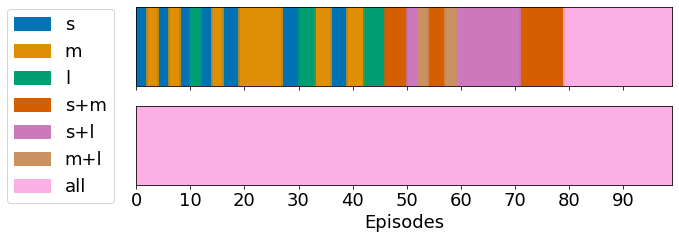

In [53]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

x = []
ys = np.zeros((len(cartpole_curriculum), len(c_map.keys()))) - 1
labels = []
already_labeled = []
label_map = {
    0: 's',
    1: 'm',
    2: 'l',
    3: 's+m',
    4: 's+l',
    5: 'm+l',
    6: 'all'
}
for i, idx in enumerate(id_list):
    x.append(i)
    ys[i, c_map[idx]] = 1

rr_y = [1. for _ in x]
    
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))
label_idx = 0
for y in ys.T:
    ax1.step(np.arange(len(y)), y, where='post', c=pallet[label_idx])
    ax1.fill_between(x, y, step='post', label=label_map[label_idx], color=pallet[label_idx])
    label_idx += 1
ax1.set_ylim([0, 1])
ax1.set_yticks([])
ax1.set_xlim([x[0], x[-1]])
ax2.set_xlabel('Episodes')

ax2.step(np.arange(len(rr_y)), rr_y, where='post', c=pallet[6])
ax2.fill_between(x, rr_y, step='post', color=pallet[6])
ax2.set_ylim([0, 1])
ax2.set_yticks([])

# Shrink current axis by 20%
box = ax1.get_position()
ax1.set_position([box.x0, box.y0 + box.height*.2, box.width * 0.8, box.height*.8])
ax2.set_position([box.x0, box.y0 - box.height*.8, box.width * 0.8, box.height*.8])

# Put a legend to the right of the current axis
ax1.legend(loc='center right', bbox_to_anchor=(-0.025, -0.25))
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
ax2.xaxis.grid(color='gray', linestyle='dashed')
ax2.set_axisbelow(True)